
# Exploratory Data Analysis Notebook #2 (Intermediate) in progress

This notebook is going to be breaking down some of the more in depth results of the research paper, namely climbing peak force vs grade, critical force in terms of body mass and peak force against grade, and how CF (the isometric version) of CP (isotonic, forearm and shoulder engagement) is measured against work capacity (W')


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataframe = pd.read_csv('Climbing Critical Force Data - Giles et al 2020.csv')
dataframe = dataframe.dropna(axis=1, how='all')
dataframe = dataframe.dropna(axis=0, how='all')
print(dataframe.head())

     #     SEX  AGE (YRS)  HEIGHT (CM)  BODY MASS (KG)  YRS CLIMBING  \
0  0.0  Female       38.0        164.0            56.5          10.0   
1  1.0  Female       28.0        157.5            56.1          13.0   
2  2.0  Female       26.0        159.0            51.8           2.0   
3  3.0  Female       26.0        169.0            56.3           8.0   
4  4.0  Female       22.0        173.5            71.8           8.0   

   CLIMB HRS WEEK  TRAIN HRS WEEK  SPORT GRADE IRCRA  BOULDER GRADE IRCRA  \
0             3.0             0.0                NaN                 19.0   
1            14.0             4.0                NaN                 21.5   
2             5.0             0.8                NaN                 17.0   
3             6.0             2.0               15.0                 19.0   
4             9.0             2.0                NaN                 20.5   

   # REPS  PEAK FORCE (KG) PEAK FORCE % BODY MASS  CF (KG) CF % PEAK FORCE  \
0    24.0            33.28

## Further Grade Breakdowns

I thought it'd be interesting to convert the IRCRA grades to scales that me and many other North American based climbers would be more familiar with; mainly the V-Scale for bouldering and the Yosemite Decimal System for Sport/Roped Climbing. 

I utilized data from [Comparative grading scales, statistical analyses, climber descriptors and ability
grouping: International Rock Climbing Research Association Position Statement](https://core.ac.uk/download/pdf/77059908.pdf) and based my measurements off of their analysis.

## Converting IRCRA bouldering grades into V-scale.

Following their IRCRA reporting and Vermin Scale (V-Scale) reporting, I binned the IRCRA grades into V grades, and did an overall count to report the numbers. 

In [66]:

v_bins = [16,17,18,19,20,22,23,24,27]
v_bin_labels = ['V2','V3','V4','V5','V6','V7','V8','V9+']
v_bin = pd.cut(dataframe['BOULDER GRADE IRCRA'],bins=v_bins,labels = v_bin_labels).value_counts().sort_index(ascending=False).to_frame()

Text(0, 0.5, 'V scale')

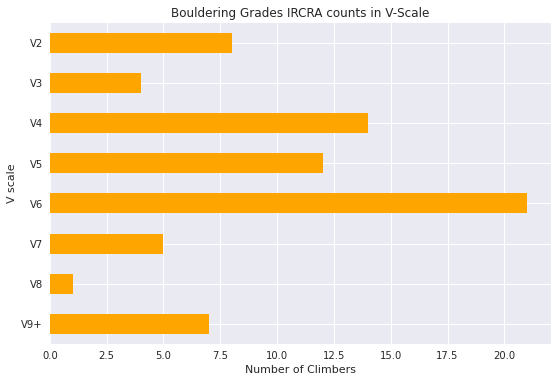

In [69]:
v_bin.plot(kind='barh',color='orange',legend=False)
plt.style.use('seaborn') 
plt.title('Bouldering Grades IRCRA counts in V-Scale')
plt.xlabel('Number of Climbers')
plt.ylabel('V scale')


Converting IRCRA rope grades into Yosemite Decimal Systems

## Training Hours per Week vs Climbing Grade (Sport, Bouldering)

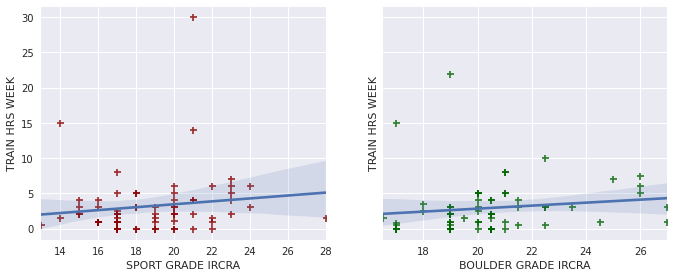

In [71]:
#grade versus training time
# (dataframe['SPORT GRADE IRCRA'].notnull() & dataframe['TRAIN HRS WEEK'].notnull())
# sns.scatterplot(data = dataframe, x="SPORT GRADE IRCRA", y="TRAIN HRS WEEK")
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10 , 4), sharey=True)

# use the function regplot to make a scatterplot for Sport Grades
ax1 = sns.regplot(ax= ax1, x=dataframe["SPORT GRADE IRCRA"], y=dataframe["TRAIN HRS WEEK"], marker='+', scatter_kws={"color":"darkred"})

# use the function regplot to make a scatterplot for Bouldering Grades
ax2 = sns.regplot(ax= ax2,x=dataframe["BOULDER GRADE IRCRA"], y=dataframe["TRAIN HRS WEEK"], marker='+', scatter_kws={"color":"darkgreen"})


<AxesSubplot:xlabel='BOULDER GRADE IRCRA', ylabel='PEAK FORCE (KG)'>

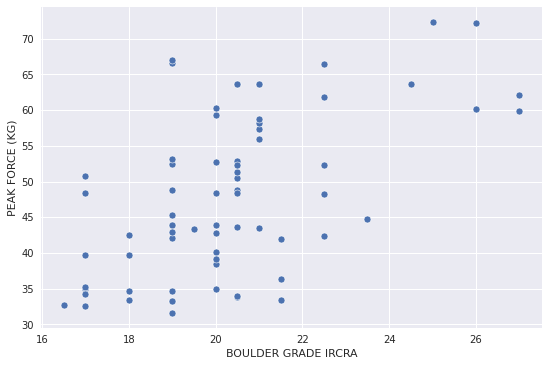

In [73]:
#peak force vs grade
pf_bin = (pd.cut(dataframe['PEAK FORCE (KG)'],bins=5).value_counts().sort_index(ascending=False)).to_frame()
pd.cut(dataframe['PEAK FORCE (KG)'], bins=5)
sns.scatterplot(data = dataframe, x="BOULDER GRADE IRCRA", y="PEAK FORCE (KG)")

In [75]:
#weight vs grade?
#  To measure grades (difficulty) in climbing, the IRCRA (International Rock Climbing Research Association) grading scale was used. 

In [77]:
#yrs climbing, age, cf 

In [79]:
#cf % body mass, cf% peak force vs [grade] lineplot/jointplot?

#weird chart that doesnt work

# sns.set_theme(style="darkgrid")

# g = sns.jointplot(x="YRS CLIMBING", y="PEAK FORCE (KG)", data=dataframe,
#                   kind="reg", truncate=False,
#                   xlim=(0, 40), ylim=(30, 80),
#                   color="m", height=7)

In [81]:
#cf % body mass

In [83]:
#cf % peak force vs grade

In [84]:
#critical force and work capacity is the biggest thing (w')

     #     SEX  AGE (YRS)  HEIGHT (CM)  BODY MASS (KG)  YRS CLIMBING  \
0  0.0  Female       38.0        164.0            56.5          10.0   
1  1.0  Female       28.0        157.5            56.1          13.0   
2  2.0  Female       26.0        159.0            51.8           2.0   
3  3.0  Female       26.0        169.0            56.3           8.0   
4  4.0  Female       22.0        173.5            71.8           8.0   

   CLIMB HRS WEEK  TRAIN HRS WEEK  SPORT GRADE IRCRA  BOULDER GRADE IRCRA  \
0             3.0             0.0                NaN                 19.0   
1            14.0             4.0                NaN                 21.5   
2             5.0             0.8                NaN                 17.0   
3             6.0             2.0               15.0                 19.0   
4             9.0             2.0                NaN                 20.5   

   # REPS  PEAK FORCE (KG) PEAK FORCE % BODY MASS  CF (KG) CF % PEAK FORCE  \
0    24.0            33.28